In [1]:
import numpy as np
import pandas as pd


In [3]:
dataset=pd.read_csv("insurance_pre.csv")

In [4]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [6]:
dataset['smoker']=dataset['smoker'].apply({'yes':1,'no':0}.get)

dataset=pd.get_dummies(dataset,drop_first=True,dtype=int)

In [7]:
dataset.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'sex_male'], dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   int64  
 4   charges   1338 non-null   float64
 5   sex_male  1338 non-null   int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 57.6 KB


In [10]:
dataset

,age,bmi,children,smoker,charges,sex_male
0,19,27.900,0,1,16884.92400,0
1,18,33.770,1,0,1725.55230,1
2,28,33.000,3,0,4449.46200,1
3,33,22.705,0,0,21984.47061,1
4,32,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,1
1334,18,31.920,0,0,2205.98080,0
1335,18,36.850,0,0,1629.83350,0
1336,21,25.800,0,0,2007.94500,0


In [11]:
independent=dataset[['age', 'bmi', 'children', 'smoker',  'sex_male']]

In [12]:
independent

,age,bmi,children,smoker,sex_male
0,19,27.900,0,1,0
1,18,33.770,1,0,1
2,28,33.000,3,0,1
3,33,22.705,0,0,1
4,32,28.880,0,0,1
...,...,...,...,...,...
1333,50,30.970,3,0,1
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [13]:
dependent=dataset[['charges']]

In [14]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.20,random_state=0)

In [16]:
X_train

,age,bmi,children,smoker,sex_male
621,37,34.100,4,1,1
194,18,34.430,0,0,1
240,23,36.670,2,1,0
1168,32,35.200,2,0,1
1192,58,32.395,1,0,0
...,...,...,...,...,...
763,27,26.030,0,0,1
835,42,35.970,2,0,1
1216,40,25.080,0,0,1
559,19,35.530,0,0,1


In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
regressor=regressor.fit(X_train,y_train)

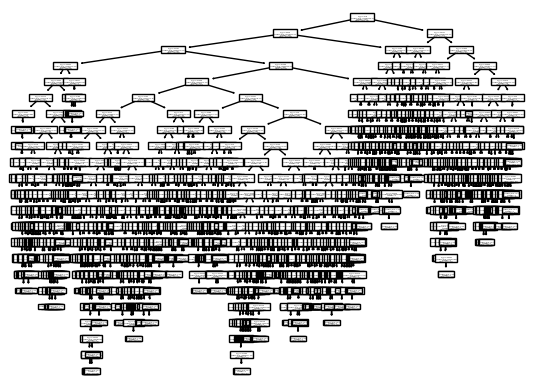

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [19]:
X_train

,age,bmi,children,smoker,sex_male
621,37,34.100,4,1,1
194,18,34.430,0,0,1
240,23,36.670,2,1,0
1168,32,35.200,2,0,1
1192,58,32.395,1,0,0
...,...,...,...,...,...
763,27,26.030,0,0,1
835,42,35.970,2,0,1
1216,40,25.080,0,0,1
559,19,35.530,0,0,1


In [21]:
y_pred=regressor.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [25]:
r_score

0.732657461946846

In [48]:
criterion_list = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter_list = ['best', 'random']
max_features_list = ['sqrt', 'log2']

results = []

for criterion_value in criterion_list:
    for random_value in splitter_list:
        for max_features_value in max_features_list:
            regressor = DecisionTreeRegressor(criterion=criterion_value, splitter=random_value, max_features=max_features_value)
            regressor = regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            r_score = r2_score(y_test, y_pred)
            
            # Store the results
            results.append({
                'criterion': criterion_value,
                'splitter': random_value,
                'max_features': max_features_value,
                'R-squared': r_score
            })

results_df = pd.DataFrame(results)

# Display the table
print(results_df)

         criterion splitter max_features  R-squared
0    squared_error     best         sqrt   0.669371
1    squared_error     best         log2   0.704252
2    squared_error   random         sqrt   0.685812
3    squared_error   random         log2   0.677778
4     friedman_mse     best         sqrt   0.596788
5     friedman_mse     best         log2   0.748285
6     friedman_mse   random         sqrt   0.672064
7     friedman_mse   random         log2   0.675962
8   absolute_error     best         sqrt   0.826151
9   absolute_error     best         log2   0.715086
10  absolute_error   random         sqrt   0.713686
11  absolute_error   random         log2   0.693696
12         poisson     best         sqrt   0.674881
13         poisson     best         log2   0.777971
14         poisson   random         sqrt   0.695698
15         poisson   random         log2   0.592118


In [50]:
import pickle
filename="finalized_model_DecisionTree.sav"
pickle.dump(regressor,open(filename,'wb'))

In [51]:
loaded_model=pickle.load(open("finalized_model_DecisionTree.sav",'rb'))
result=loaded_model.predict([[1234,345,4565,1,0]])

C:\Users\sharanmc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [52]:
result

array([47291.055])